# Predicting Diabetic Patients Using KNN Classifier

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# do not show warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Reading data from the 'dataset.csv' using pandas as dataframe
data = pd.read_csv('Diabetes_Dataset.csv')
print(data.columns)
print(data.shape)
# find the null values counts in eac
print(f'The null values in each column are {data.isnull().sum()}')

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')
(1000, 14)
The null values in each column are ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [27]:
column_to_drop = "No_Pation"
data = data.drop(column_to_drop, axis=1)

# Display the columns after dropping
print(data.columns)
print(data.shape)
# find the null values counts in eac
print(f'The null values in each column are {data.isnull().sum()}')

Index(['ID', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL',
       'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')
(1000, 13)
The null values in each column are ID        0
Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64


In [28]:
print(f'The unique value of gender are {data.Gender.unique()}')
print(f'The unique value of target are {data.CLASS.unique()}')  
# print correlation of the features 
data['Gender'] = data['Gender'].str.lower()
data['CLASS'] = data['CLASS'].str.lower()
data['CLASS'] = data['CLASS'].str.strip()
# check the uique values in gender column 
print(f'The unique value of gender after preprocessing are {data.Gender.unique()}')
# print the unique values in target column
print(f'The unique value of target after preprocessing are {data.CLASS.unique()}')

The unique value of gender are ['F' 'M' 'f']
The unique value of target are ['N' 'N ' 'P' 'Y' 'Y ']
The unique value of gender after preprocessing are ['f' 'm']
The unique value of target after preprocessing are ['n' 'p' 'y']


In [29]:
# print the value counts of each class in target column
print(f'Unique classes count are {data["CLASS"].value_counts()}')

Unique classes count are CLASS
y    844
n    103
p     53
Name: count, dtype: int64


In [31]:
features = data[['ID', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI']]
target = data['CLASS']
print(features.shape)
print(target.shape)

(1000, 12)
(1000,)


In [32]:
# one hot enconding on both features[['Gender']] and target using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
features['Gender_encoded'] = encoder.fit_transform(features['Gender'])
le_gender_mapping = dict(zip( encoder.transform(encoder.classes_),encoder.classes_))
print(le_gender_mapping)
target_encoded = encoder.fit_transform(target)
le_class_mapping = dict(zip(encoder.transform(encoder.classes_),encoder.classes_))
print(le_class_mapping)

{0: 'f', 1: 'm'}
{0: 'n', 1: 'p', 2: 'y'}


In [33]:
numerical_features = features.drop(['ID','Gender'], axis=1)
numerical_features.corr()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_encoded
AGE,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.021486
Urea,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.116311
Cr,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.154870
HbA1c,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,-0.009362
Chol,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,-0.064763
TG,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.052111
HDL,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.130130
LDL,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,0.054563
VLDL,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133,0.194120
BMI,0.375956,0.045618,0.054746,0.413350,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000,0.072097


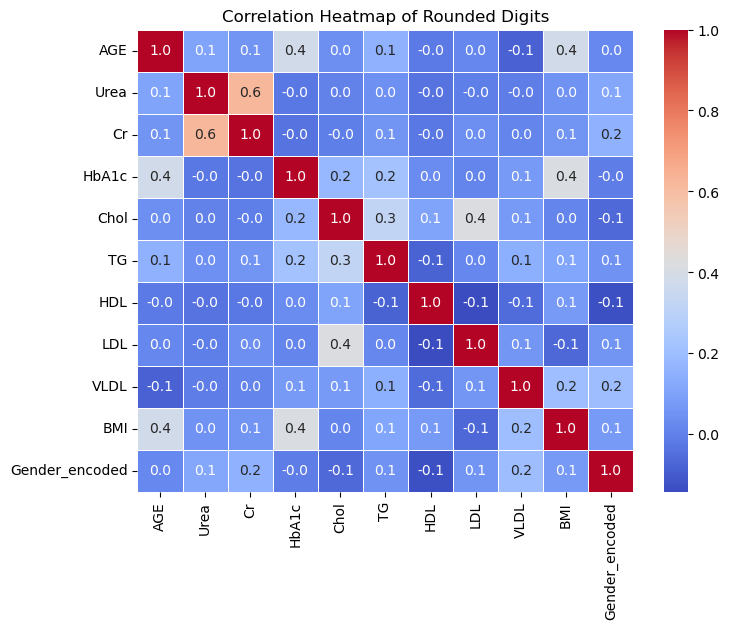

In [34]:
# Creating a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Heatmap of Rounded Digits')
plt.show()

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(numerical_features, target_encoded, test_size=0.2, random_state=42, stratify=target_encoded)

''' When you use stratify=target_encoded, the function tries to ensure 
that the proportion of different classes in the target variable remains similar 
in both the training and testing sets. This is particularly useful 
when you have imbalanced classes in your dataset'''

# print unique vaulues count in y_train and y_test numpy array
# count of unique values in y_train
print(np.unique(y_train, return_counts=True))
# count of unique values in y_test
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([ 82,  43, 675], dtype=int64))
(array([0, 1, 2]), array([ 21,  10, 169], dtype=int64))


In [37]:
# Create a K-Nearest Neighbors classifier with, for example, k=7
knn_classifier = KNeighborsClassifier(n_neighbors=7)

# Fit the KNN classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_val_pred = knn_classifier.predict(X_test)

In [38]:
# Make predictions on the testing set
y_test_pred = knn_classifier.predict(X_test)

# Print classification report on the testing set
print('\nClassification Report on Testing Set:')
print(classification_report(y_test, y_test_pred))


Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        21
           1       0.50      0.20      0.29        10
           2       0.95      0.99      0.97       169

    accuracy                           0.91       200
   macro avg       0.70      0.60      0.63       200
weighted avg       0.90      0.91      0.90       200



In [39]:
from sklearn.metrics import confusion_matrix
# Print confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print('\nConfusion Matrix on Testing Set:')
print(conf_matrix_test)


Confusion Matrix on Testing Set:
[[ 13   1   7]
 [  6   2   2]
 [  1   1 167]]


In [40]:
# Calculate accuracy on the testing set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print Accuracy on the testing set
print(f'Accuracy on Testing Set: {round(accuracy_test * 100, 2)} %')

Accuracy on Testing Set: 91.0 %


In [51]:
# Get user input for each independent variable
user_input_array = np.empty((1, len(numerical_features.columns)))

for i, feature_name in enumerate(numerical_features.columns):
    user_input = float(input(f"Enter the value for {feature_name}: "))
    user_input_array[0, i] = user_input

# Make prediction for user input
user_prediction = knn_classifier.predict(user_input_array)

# Convert the encoded prediction back to the original class label
predicted_class_user = encoder.inverse_transform(user_prediction)[0]

# Display the prediction
print("Predicted Class for the User Input:", predicted_class_user)

Enter the value for AGE: 18
Enter the value for Urea: 12
Enter the value for Cr: 2
Enter the value for HbA1c: 2
Enter the value for Chol: 25
Enter the value for TG: 12
Enter the value for HDL: 24
Enter the value for LDL: 12
Enter the value for VLDL: 2
Enter the value for BMI: 56
Enter the value for Gender_encoded: 0
Predicted Class for the User Input: n
